# 사다리 게임 확률 분석
사다리 게임은 한국과 일본에서만 주로 하는 것으로 보이며, 영미권에서는 관련 자료를 거의 찾아볼 수 없다.  
오픈소스 구현을 발견하지 못해 직접 간단한 사다리 알고리즘을 구현해서 확률을 관찰 해보도록 한다.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
length = 12 # 사다리의 길이
width = 8 # 사다리의 너비(선택가능한 갯수)

ladder = None # 사다리 배열
pos = None # 진행 경과를 저장하기 위한 임시 배열

In [3]:
# 가로 발판 위치를 랜덤하게 뽑아준다.
def get_step(ladder, pos):
    width = int((ladder.shape[1] + 1) / 2)
    randomized_step = random.randint(1, width - 1) * 2 - 1

    if (randomized_step - 2 >= 1 and ladder[pos, randomized_step - 2] == 1) or \
            (randomized_step + 2 <= width * 2 - 3 and ladder[pos, randomized_step + 2] == 1):
        return get_step(ladder, pos)
    else:
        return randomized_step

In [4]:
import random

# 길이, 너비 만큼의 사다리를 생성한다.
def make_ladder(length=10, width=10):
    global ladder
    ladder = np.zeros((length, width * 2 - 1), dtype=int)
    global pos
    pos = np.zeros(length, dtype=int)

    # 가로 발판을 생성한다.
    for i in range(1, length - 1):
        ladder[i, get_step(ladder, i)] = 1
#         ladder[i, get_step(ladder, i)] = 1
#         ladder[i, get_step(ladder, i)] = 1

In [5]:
def play_ladder(ladder, pos, start_point=1):
    pos[0] = (start_point - 1) * 2 # 출발지
    length = ladder.shape[0]
    width = int((ladder.shape[1] + 1) / 2)
    
    for j in range(1, length):
        prev_pos = pos[j - 1]
            
        if prev_pos > 1 and ladder[j, prev_pos - 1] == 1:
            pos[j] = prev_pos - 2
        elif prev_pos < (width - 1) * 2 and ladder[j, prev_pos + 1] == 1:
            pos[j] = prev_pos + 2
        else:
            pos[j] = prev_pos

In [6]:
make_ladder(length, width)
play_ladder(ladder, pos, 1)

# 사다리 형태 점검
np.set_printoptions(threshold=np.nan)
ladder

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
pos

array([0, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4])

In [8]:
# 사다리를 count 만큼 시도한다.
def try_ladder(count=100, start_point=1):
    X = np.full(count, start_point)
    y = []

    for x in np.nditer(X):
        if start_point == 0: # 시작점을 0으로 지정할 경우 랜덤하게 시작한다.
            x = np.random.randint(width) + 1
        make_ladder(length, width)
        play_ladder(ladder, pos, x)

        y.append(int(pos[-1] / 2 + 1))
    
    return np.array(y)

y = try_ladder(10, 1)
y

array([1, 2, 1, 2, 2, 2, 3, 1, 2, 1])

In [9]:
# matplotlib의 hist() 그리드가 직관적이지 않아 bar()로 표현하도록 한다.
# bar()를 그리기 위해 누적을 직접 계산해 histogram을 만든다.
def make_hist(y):
    z = np.zeros(width, dtype=int)
    
    for x in np.nditer(y):
        z[x - 1] += 1
        
    return z

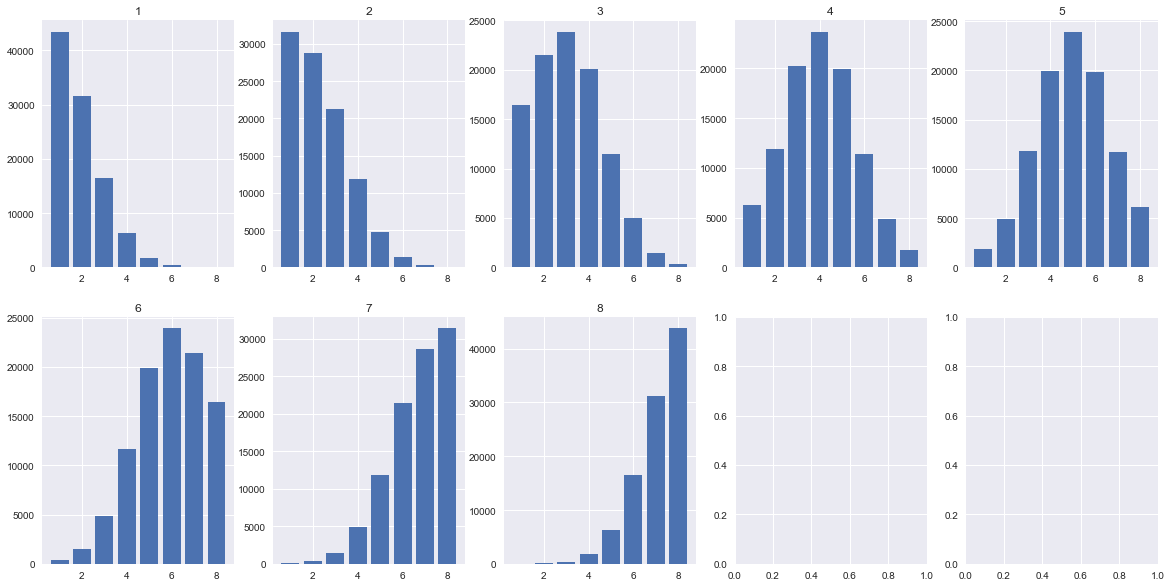

In [12]:
# 1 ~ 10 까지 각 출발점에 따른 도착점 분포를 2x5 plot에 표현한다.
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

start_point = 1
for i in range(2):
    for j in range(5):
        if start_point > width:
            break
        y = try_ladder(100000, start_point)
        
        axs[i, j].set_title(start_point)
        axs[i, j].bar(np.arange(1, width + 1), make_hist(y))
        
        start_point += 1

In [13]:
length

12

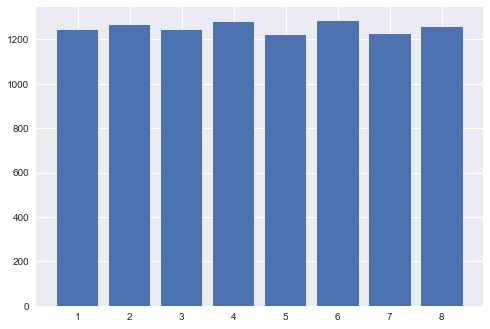

In [11]:
# 출발점이 랜덤인 경우 도착점 분포
plt.xticks(np.arange(1, width + 1))

y = try_ladder(10000, 0)  # 시작점을 랜덤하게 정한다.
plt.bar(np.arange(1, width + 1), make_hist(y))
plt.show()


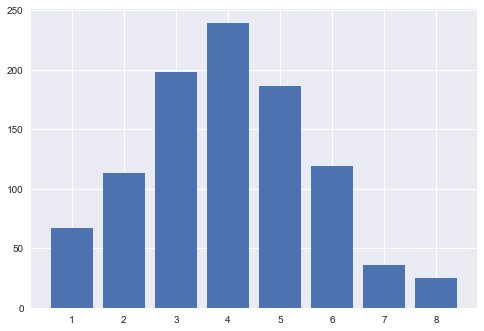

In [12]:
# 『통계의 힘』 책에서 나온대로 동일하게 실험한다.
def try_ladder_as_book(count=100, start_point=0, end_point=1):
    X = np.full(count, start_point)
    y = []

    for x in np.nditer(X):
        if start_point == 0: # 시작점을 0으로 지정할 경우 랜덤하게 시작한다.
            x = np.random.randint(width) + 1
        make_ladder(length, width)
        play_ladder(ladder, pos, x)

        if int(pos[-1] / 2 + 1) == end_point:
            y.append(x)
    
    return np.array(y)

# --
plt.xticks(np.arange(1, width + 1))

length = 12
y = try_ladder_as_book(8000, 0, 4)
plt.bar(np.arange(1, width + 1), make_hist(y))
plt.show()


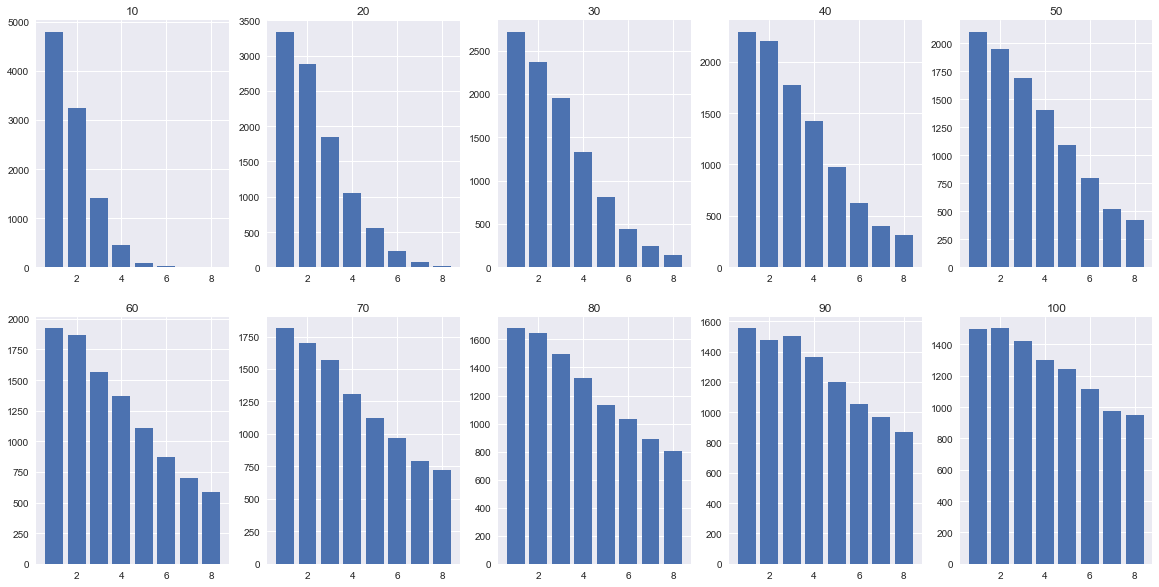

In [13]:
# 계단 갯수(length)에 따른 도착점 분포를 표현한다.
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

length = 10
for i in range(2):
    for j in range(5):
        y = try_ladder(10000, 1)
        
        axs[i, j].set_title(length)
        axs[i, j].bar(np.arange(1, width + 1), make_hist(y))
        
        length += 10